# Million Song Dataset

The million song dataset is a massive data set containing information about 1 million songs. Although it contains audio-level features (i.e., what notes are played at what second), we will just analyze some metadata about these songs.

The data resides in a SQLite3 database `/data/songs.db`. This SQLite3 database contains just one table called `songs`.

In [3]:
import pandas as pd

In [4]:
%matplotlib inline

## Question 1 (10 points)

Make a connection `conn` to the SQLite database.

In [5]:
from sqlalchemy import create_engine
conn = create_engine("sqlite:////data/songs.db")

In [6]:
assert pd.read_sql("SELECT COUNT(*) FROM songs", conn).iloc[0, 0] == 1e6

## Question 2 (10 points)

Have songs been getting longer over time? Make an appropriate visualization using this data. Then, write a sentence or two summarizing your conclusions.

In [16]:
from sqlalchemy import inspect
inspector = inspect(conn)

# for table_name in inspector.get_table_names():
#     for column in inspector.get_columns(table_name):
#         print(column)

query1 = '''
SELECT duration, year, shs_perf, shs_work
FROM songs
'''

df = pd.read_sql(query1, conn)

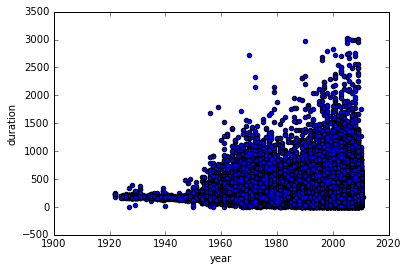

In [19]:
df[df.year != 0].plot.scatter(x="year", y="duration")

Durations of songs have been getting longer over the years.

## Question 3 (10 points)

Make a histogram of artist_familiarity scores by artist. This measures how well-known an artist is. 

Notes:
- An artist may appear multiple times in this data set, but each artist should only be included once in your histogram.
- A score of -1 means that the artist does not have a familiarity score. These cases should be excluded from your histogram.

In [31]:
# for table_name in inspector.get_table_names():
#     for column in inspector.get_columns(table_name):
#         print(column)

query2 = '''

SELECT AVG(artist_familiarity)
FROM songs
GROUP BY artist_name

'''

df3 = pd.read_sql(query2, conn)

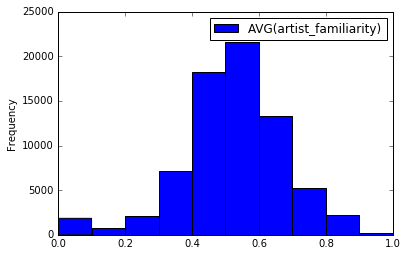

In [34]:
df3[df3["AVG(artist_familiarity)"] >= 0].plot.hist()